# 13 Reverse Quantum Annealing with Portfolio Optimization Problem as an example

## ポートフォリオ最適化問題
  資産運用して投資活動を行うとき、できるだけリスクを回避しながら大きな収益を実現させたい。なので、収益が限定的であるが、リスクが小さい（ないし全くない）資産と見込める収益が大きい分リスクも大きい資産を組み合わせてポートフォリオを作って分散投資を行うのが一般的な戦略になる。

  この時、与えられた一定のリスクでは最大利益を実現したい、または同じ利益を実現する場合できるだけ小さいリスクを取るには、最適なポートフォリオを選ぶ必要がある。現在、よく利用される手法はMarkowitzによる現代ポートフォリオ理論(Modern Portfolio Theory)であり、ポートフォリオを構成する銘柄の間の相関を考慮して、その共分散を最小にさせるような手法になる[1]。
  $$
  \min \sum_{i=1}^{N}\sum_{j=1}^{N}w_{i}w_{j}\sigma_{ij}; \quad \sum_{i=1}^{N}W_{i}=1; \quad \sum_{i=1}^{N}W_{i}\mu_{i}=R
  $$
  ただし、$w_{i}$は各銘柄がポートフォリオ内を占める重みで、$\sigma_{ij}$は銘柄間の共分散である。$\mu_{i}$は各銘柄の期待収益で、$R$はこのポートフォリオの総収益になる。

  この時、ポートフォリオのパフォーマンスの評価によく使われる指標としてSharpe Ratioというのがある。

  ### Sharpe Ratio
  Sharpe Ratioは投資の効率性を評価する指標で、銘柄単体とポートフォリオにたいして計算できる。1966念にウィリアム・シャープによって提案された[3]。その基本的な定義は次のような形になる。
  $$
  S = \frac{\bar{r}-r_0}{\sigma}
  $$
  ここの$\bar{r}$は一定時間内の平均的なリターン率であり、月間や年間リターンを利用することも多い。$r_0$はリスクなしの場合のリターン率で、安定した国債の利子率などを用いることが多い。そして$\sigma$はボラティリティを表していて、資産価値の変動の激しさを意味している。
  
  また、これらの値は実際使う場面によって異なる計算方法で算出される。例えばリターンは単純リターンとして$r=P(t+1)/P(t) - 1$で価格$P$で計算される場合と$r=log[P(t+1)/P(t)]$のように対数リターン率として計算される場合がある。そしてボラティリティも価格の変動からとリターンからのやり方が存在する。具体的に興味がある方は金融工学や市場分析などに関連する本とサイトに参照してください。

  ### ポートフォリオの評価と最適化
  Sharpe Ratioの定義から、その値が大きいということは収益が大きいまたはリスク（ボラティリティ）が小さいことを意味しているのが分かる。ある与えられた銘柄の集合で作られたポートフォリオのうち、最大のSharpe Ratioを実現できるような組み合わせは、同じリスクに対して最大のリターンを得る組み合わせになる。なので、ポートフォリオの最適化問題は一定の考え方の元でShape Ratioを最大にする問題に置き換えられる。

  現実において、この最適化は銘柄を選別した上でそれぞれの銘柄に投入する資金の量を決定しなければならない。つまり、選ぶ銘柄と各銘柄のウェイトを決定する問題になる。このチュートリアルは、参考した論文[2]に従い、簡単のために各銘柄のウェイトが等しくする戦略について考える。この時、問題は$M$個ある銘柄のうち$N$個銘柄を選び出して、実現Sharpe Ratioを最大にするものになる。すると、次のようなQUBO形式に問題を翻訳できる。
  $$
  \mathcal{O}(\bm{q})=\sum_{i=1}^{N}a_{i}q_{i}+\sum_{i=1}^{N}\sum_{j=i+1}^{N}b_{ij}q_{i}q_{j}
  $$
  ここの$q_{i}$は各銘柄に対する洗濯で$1$であればポートフォリオに組み入れて、$0$であれば組み入れない意味を持つ。そして$a_i$は銘柄自体のパフォーマンスによる魅力スコアであり、$b_ij$は銘柄間のペアワイズ相関で決められた罰金または賞金度合を表す。

  具体的に$a_i$と$b_ij$は次の表1に従って決定される。

<div>
    <img src="images/013_RQA_QUBO.png">
</div>


  ここの$a_i$のグループはポートフォリオを構成する人の基準によって決められた基準によって、銘柄を魅力的であるから魅力ではない順で並べてそれを順位付けした後に、均等に分けた場合形成されたグループになる。この魅力的な基準はリターン率の高さや損失の少なさなどの要素も取り入れられるが、このチュートリアルでは単純に銘柄単体のSharpe Ratio順を用いた。そして$b_{ij}$は対数リターンの時系列から求められた相関行列の成分$\rho_{ij}$の値によって決められている。

  このQUBOを使って量子アニーリングを行えば最適のポートフォリオを得ることができるはず。また、選択銘柄の数について指定したい場合はこのチュートリアルシリーズで既に説明があったように銘柄数に対して罰金法の制限を付け加えればできる。ただし、参考にした論文[2]によると、罰金法を利用した場合、導入した大きい相互作用（ペナルティ）はアニーリングの性能や最終的に取得した結果にも影響するのが分かる。さらに、最適のポートフォリオに含まれる銘柄の数が分からないのがより現実的にであるので、このチュートリアルでは銘柄数制限なして最適化を行う。

## Reverse Quantum Annealingによるポートフォリオ最適化
現実のポートフォリオ最適化の問題は基本、大きな市場から銘柄を選択することになる。候補銘柄数の増加によって最適のポートフォリオを作るための計算量が非常に大きくなる。なので、一定の条件の下に選別を行ってから最適化アルゴリズを適応するのが普通である。そして、銘柄の組合せの自由度から、最終的の実現Sharpe Ratioが最大Sharpe Ratioと極めて近い値を持つ非最適解が多く存在することもあり得る。伝統的なアルゴリズムがそのような解にハマった場合抜け出すにも時間とリソースが必要となる。そのため、以上の既存な問題点を回避しながらポートフォリオ最適化問題を解くには、量子アニーリングのような大きい数の相関を取り扱えてローカルミニマムから脱却できる技術が有利である。

ただし、参考論文[2]に示されたように、単純なForward Annealingのみを行う場合、銘柄数の増加によって、最適解までにたどり着く時間も大きく増加して、伝統的の遺伝アルゴリズムと違いパフォーマンスになるのが分かる。その理由としてはやはり最適解と近い値のSharpe Ratioを持つ解と最適解はエネルギーの違いも同じように小さいと考えられる。すると、最適解への変化はほとんどエネルギー差がほぼない準位の間で高いポテンシャルの障壁がある場合の遷移になるため、遷移が起こるまでにより長い時間が必要となる。また、量子アニーリングマシンの実機では通常のアニーリングを行う途中で熱ノイズなどによる影響で系が励起されて時間発展する場合もあって、それによって最終の結果が最適解とならない可能性もある。


### Reverse Quantum Annealing
これらの量子アニーリングを用いた時の問題点を解決するために提案された手法の一つは、Reverse Quantum Annealingである。名前通り、通常のForward Annealingと逆方向のステップを導入するような量子アニーリングを指す。通常のForwardAnnealingの時間依存のハミルトニアンは次のように書ける。
$$
\mathcal{H}_{\mathrm{QA}}(t)=A[t]\sum_{i=1}^N\sigma_{i}^{\mathrm{x}}+B[t]\mathcal{H}_{\chi-\mathrm{Ising}}
$$
この$A[t]$はアニーリングを行うとき系にかける横磁場を表していて、$B[t]$は問題のハミルトニアン$\mathcal{H}_{\chi-\mathrm{Ising}}$の振幅になる。次の図でのa)で示されるように、Forward Annealingの場合はアニーリングの侵攻によって、$A[t]$がだんだん小さくなり、同時に$B[t]$主導的になっていく。最終的にアニーリングが完了するときは$A[t]=0$になる。

<div>
    <img src="images/013_QAandRQA.png">
</div>

対してReverse Annealingはb)のように$A[t]=0,B[t]=1$の状態から出発して、まず通常と逆に$B[t]$を小さくしていく。これはReverse Phaseになる。この段階では系のエネルギーが逆に高くなるため、c)に示されたようなAとBの間のポテンシャル障壁は超えやすくなる。そしてある値に達するとそのまま系を維持してしばらく待つ。これはPause Phaseになる。この時もまた高いエネルギーの状態にあり、熱的ホッピングが起こりやすいため、Bの右のようなポテンシャルの山も超えやすくなる。結果的に最初に入ったローカルミニマムから脱して最適解付近にたどり着く可能性が上がる。最後にまた$A[t]$を小さくして、$B[t]$を大きくさせるForward Phaseで通常のアニーリングをして、最適解を取得する。この時、Reverse Annealingを止めた場所や、各段階に使った時間などによって、最後のパフォーマンスにも影響するのが考えられる。


### Reverse Quantum Annealingによるポートフォリオ最適化の手順
このReverse Quantum Annealingの手法を実行するには実際もう一つの条件がある。それがReverse Phaseの初期状態である。この状態はランダムに生成された初期状態を用いても可能ではあるが、手法が提案された背景からも、最適解探索の効率の観点からもある種類のローカルミニマム状態を用意したほうが良いと分かる。その初期状態になるローカルミニマムを得るには参考論文[2]では伝統的なアルゴリズムで得られた出力を利用した。このチュートリアルもそれに従う。

なので、これから行う実装は基本論文[2]の流れを参考にして以下のようになる。
- 最適化を行う銘柄データの生成
- 古典なアルゴリズムの実装とその結果の確認
- 通常のForward Annealingによる最適解探索
- Reverse Quantum Annealingによる最適解探索
- Reverse Quantum Annealingのパラメータ探索

## Open Jijを用いた実装

### 最適化を行う銘柄データの生成
参考論文[2]にある方法に従って、与えられた初期値を用いて、ブラウン運動による銘柄チャートを生成する。

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Magic numbers to generate assets
rho = 0.1 # input uniform correlation
mu = 0.075 # expected value
sigma = 0.15 # volatility/standard error
r0 = 0.015 # no risk return

参考論文[2]の付録Aによって、各時刻においてチャートの運動は前の時刻の運動によって
$$
S(t_{n+1})=S(t_n)\exp(\mu-\frac{1}{2}\sigma^2)\Delta t + \sigma Z_n\sqrt{\Delta t}
$$
のように与えられる。ここの$Z_n$はcholesky分解で作られた一様相関行列$\rho$を従う多変量正規分布になる。

それを実行して適当にチャートをプロットして様子を確認する。最初同じところから始めても一年間経つと、全体が広がっていく様子が分かる。また一部銘柄が大きく上昇または降下するのも確認できる。

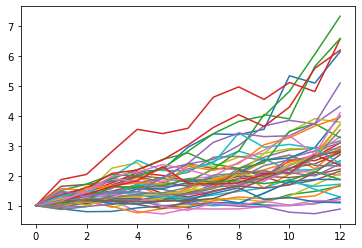

In [35]:
#相関正規確率変数Znの生成
def createZvariables(N, rho):
  rho_mat = np.full((N,N), rho)
  rho_mat[range(N), range(N)] = 1.0
  rho_chole = np.linalg.cholesky(rho_mat)
  zNs_temp = np.random.normal(0, 1, (10000, N))
  zNs = zNs_temp @ rho_chole
  return zNs

#チャートのブラウン運動の生成
def GetNextSt(St, mu, sigma, zN):
  Deltat = 1
  scale = np.exp((mu-0.5*sigma*sigma)*Deltat + sigma*zN*np.sqrt(Deltat))
  NextSt = St * scale
  return NextSt

Nassets = 48 #生成する銘柄の数
chart = list()
ZList = list()
Zvariables = createZvariables(Nassets, rho)
Zlabels = random.sample([x for x in range(10000)], 12) #Z variable shuffle

for label in Zlabels:
  ZList.append(Zvariables[label])

for iasset in range(Nassets):
  chart_asset = [1.0] #初値 相対価格で1.0

  #12ステップ（か月）シミュレーションを行う
  for month in range(12):
    chart_asset.append(GetNextSt(chart_asset[month], mu, sigma, ZList[month][iasset]))

  chart.append(chart_asset)
  #print(chart_asset) #各銘柄の具体的な数値をプリント
  plt.plot(list(range(13)), chart_asset)

plt.show()

銘柄のデータを生成できたので、各銘柄のSharpe Ratioを計算する。ここの結果を評価するに使うのは実現Sharpe Ratioで、その定義に従って無リスク利回り率を超過した超過収益率の平均$\bar{r}$と超過リターン率の標準偏差$\sigma$で求める。チャートを確認するとき分かったように、銘柄数が少ない場合は偶然による偏りが大きい、かつ生成条件に銘柄間に相関があるので、。銘柄を100回生成してその平均Shape Ratioの確認することでそれらの影響を減らす。結果として、銘柄の平均Sharpe Ratioが期待通り$0.4$になるのを確認できる。また、Sharpe Ratioの計算定義を変更した場合、Sharpeの値が変化するのも確認できるが、おおむね$0.40\pm0.05$の範囲内には収まる。

In [36]:

#銘柄生成関数
def CreateAssets(Nassets): 
  chart = list()
  ZList = list()
  Zvariables = createZvariables(Nassets, rho)
  Zlabels = random.sample([x for x in range(10000)], 12)
  for label in Zlabels:
    ZList.append(Zvariables[label])
  for iasset in range(Nassets):
    chart_asset = [1.0]
    for month in range(12):
      chart_asset.append(GetNextSt(chart_asset[month], mu, sigma, ZList[month][iasset]))
    chart.append(chart_asset)
  return chart

#オーソドックスなSharpe Ratio
def CalculateSharpeRatio(asset):
    monthly_return = list()
    for month in range(12):
      valueChange = asset[month+1]/asset[month] - 1.0 - r0
      monthly_return.append(valueChange)

    annualized_excess_return = np.mean(monthly_return)
    volatility = np.std(monthly_return, ddof=1)

    return(annualized_excess_return/volatility)

#log-returnに基づいたSharpe Ratio
def CalculateSharpeRatio_log(asset):
  monthly_log_return = list()
  for month in range(12):
    valueChange = np.log(asset[month+1]/asset[month])
    monthly_log_return.append(valueChange)
  mean_log_return = np.mean(monthly_log_return)
  volatility = np.std(monthly_log_return, ddof=1)

  return (mean_log_return-r0)/volatility

#少し変わった定義のSharpe Ratio
def CalculateSharpeRatio_2(asset):
  monthly_log_return = list()
  monthly_return = list()
  for month in range(11):
    log_valueChange = np.log(asset[month+1]/asset[month])
    monthly_log_return.append(log_valueChange)
    valueChange = asset[month+1]/asset[month] - 1.0
    monthly_return.append(valueChange)
  annualized_excess_return = np.mean(monthly_return) - r0
  volatility = np.std(monthly_log_return, ddof=1)

  return (annualized_excess_return/volatility)

allmean = 0
for ntry in range(100): #複数回試行で同じセットないの相関による影響を消す
  Chart = CreateAssets(48) #指定した数の銘柄を作る
  mean_SR = 0.0
  n = 0.
  for asset in Chart:
    assetSR = CalculateSharpeRatio(asset) #ここを変更すればShape Ratioの計算方法を変えられる
    #assetSR = CalculateSharpeRatio_log(asset)
    #assetSR = CalculateSharpeRatio_2(asset)
    mean_SR = ((mean_SR*n)+assetSR) / (n+1) #平均Shape Ratio
    n+=1
  print("SubSet "+ str(ntry)+ " average Sharpe Ratio: " + str(mean_SR))
  allmean = ((allmean*ntry)+mean_SR) / (ntry+1)
  print("Average Sharpe Ratio of all generated: "+ str(allmean))

SubSet 0 average Sharpe Ratio: 0.20988291351033903
Average Sharpe Ratio of all generated: 0.20988291351033903
SubSet 1 average Sharpe Ratio: 0.3381306511360356
Average Sharpe Ratio of all generated: 0.2740067823231873
SubSet 2 average Sharpe Ratio: 0.4771375606956161
Average Sharpe Ratio of all generated: 0.3417170417806636
SubSet 3 average Sharpe Ratio: 0.430368714212601
Average Sharpe Ratio of all generated: 0.3638799598886479
SubSet 4 average Sharpe Ratio: 0.5015663414796292
Average Sharpe Ratio of all generated: 0.39141723620684415
SubSet 5 average Sharpe Ratio: 0.49218690027980405
Average Sharpe Ratio of all generated: 0.40821218021900413
SubSet 6 average Sharpe Ratio: 0.42190689643669455
Average Sharpe Ratio of all generated: 0.4101685682501027
SubSet 7 average Sharpe Ratio: 0.33325103681937873
Average Sharpe Ratio of all generated: 0.40055387682126226
SubSet 8 average Sharpe Ratio: 0.42988518179011276
Average Sharpe Ratio of all generated: 0.4038129107066901
SubSet 9 average Sha

銘柄の確認ができてから、作られたポートフォリオ全体のパフォーマンスを確認する、ここでは全銘柄が同じ重みで選ばれるシナリオで銘柄全体のSharpe Ratioを計算しているが、48銘柄の場合で論文の結果「平均1.4、25パーセント分位0.5、75パーセント分位2.1」を再現できていない。（TODO）

In [37]:
Nassets = 48
SR_list = list()

for ntry in range(10):
    Chart = CreateAssets(Nassets)
    portfolioChart = np.mean(Chart, axis=0)
    portfolioSR = CalculateSharpeRatio(portfolioChart)
    SR_list.append(portfolioSR)
    print(portfolioSR)
    print(np.mean(SR_list), np.percentile(SR_list, [25,75]))


0.818348065160738
0.818348065160738 [0.81834807 0.81834807]
0.8887140183121666
0.8535310417364523 [0.83593955 0.87112253]
1.2311790775445421
0.979413720339149 [0.85353104 1.05994655]
2.1013542409424875
1.2598988504899835 [0.87112253 1.44872287]
1.8979411631759522
1.3875073130271773 [0.88871402 1.89794116]
1.7029203703107396
1.4400761559077708 [0.97433028 1.84918596]
1.1794813725915854
1.4028483297197443 [1.0340977  1.80043077]
1.2093048893469955
1.3786553996731508 [1.10678953 1.75167557]
1.0936284211835685
1.3469857353965304 [1.09362842 1.70292037]
1.455701469049368
1.3578573087618142 [1.11509166 1.64111564]


### 古典アルゴリズムによる探索
続いてはQUBO行列の準備及び古典なアルゴリズムに必要な関数を実装する。ここで、ペアワイズ相関行列は論文に従い対数リターンで計算した。

In [38]:
import heapq
import pandas as pd
import copy

#Attractiveness Coversion
def SRBucket(SR_list):
    Buckets=sorted(SR_list)
    Buckets.reverse()
    GroupedList = list(np.array_split(Buckets,11))
    for i in range(len(SR_list)):
        if   SR_list[i] in GroupedList[0]: SR_list[i]=15
        elif SR_list[i] in GroupedList[1]: SR_list[i]=12
        elif SR_list[i] in GroupedList[2]: SR_list[i]=9
        elif SR_list[i] in GroupedList[3]: SR_list[i]=6
        elif SR_list[i] in GroupedList[4]: SR_list[i]=3
        elif SR_list[i] in GroupedList[5]: SR_list[i]=0
        elif SR_list[i] in GroupedList[6]: SR_list[i]=-3
        elif SR_list[i] in GroupedList[7]: SR_list[i]=-6
        elif SR_list[i] in GroupedList[8]: SR_list[i]=-9
        elif SR_list[i] in GroupedList[9]: SR_list[i]=-12
        elif SR_list[i] in GroupedList[10]: SR_list[i]=-15

#Penalty/Reward Conversion 
def CorrelationBucket(Corr):
    for i in range(len(Corr)):
        for j in range(len(Corr)):
            if Corr[i][j] >= -1.00 and  Corr[i][j] < -0.25: Corr[i][j] = -5
            elif Corr[i][j] >= -0.25 and  Corr[i][j] < -0.15: Corr[i][j] = -3
            elif Corr[i][j] >= -0.15 and  Corr[i][j] < -0.05: Corr[i][j] = -1
            elif Corr[i][j] >= -0.05 and  Corr[i][j] < 0.05: Corr[i][j] = 0
            elif Corr[i][j] >= 0.05 and  Corr[i][j] < 0.15: Corr[i][j] = 1
            elif Corr[i][j] >= 0.15 and  Corr[i][j] < 0.25: Corr[i][j] = 3
            elif Corr[i][j] >= 0.25 and  Corr[i][j] < 1.00: Corr[i][j] = 5

#Ising component for classical algorithms
def hi(SR_list, Corr, i):
    h = 0.5*SR_list[i] + np.sum(Corr[i])
    return h

def jij(Corr, i, j):
    return 1./4.*Corr[i][j]

#Create Pairwise Correlation Matrix
def CreateCorrMat(Chart):
    assets = list()
    for iasset in range(len(Chart)):
        returns = list()
        for month in range(12):
            log_return = np.log(Chart[iasset][month+1]/Chart[iasset][month])
            returns.append(log_return)
        assets.append(returns)
    Chart_pd = pd.DataFrame(assets).T
    pairwise_corr = Chart_pd.corr(method='pearson')
    return pairwise_corr

#Initial state for Greedy Search and Genetic Algorithm
def GenerateRandomSolution(Nassets):
    Solution = np.random.randint(2, size=Nassets)
    for i in range(Nassets):
        Solution[i] = 2*Solution[i] - 1
    return Solution

#得られた解のポートフォリオのSharpe Ratioを計算する
def EvaluateSolution(Solution,Chart):
    selected_assets = list()
    for i in range(len(Solution)):
        if Solution[i] == 1:
            selected_assets.append(Chart[i])
    portfolioChart = np.mean(selected_assets, axis=0)
    portfolioSR = CalculateSharpeRatio(portfolioChart)
    return portfolioSR

#遺伝アルゴリズム、突然変異を導入して子孫を作る
def CreateDescendant(Ancestor, Ndescendants, MaxMutation):
    n = 0
    index_list = range(len(Ancestor))
    Descendants = list()
    while n < Ndescendants:
        Nmutaion = np.random.randint(MaxMutation)
        Place_to_change = np.random.choice(index_list, size=Nmutaion, replace=False)
        Descendant = list()
        for place in Place_to_change:
            Descendant = copy.deepcopy(Ancestor)
            Descendant[place] = Ancestor[place] * -1
            Descendants.append(Descendant)
        n += 1
    return Descendants


In [39]:
#銘柄セットを再生成する
#ここからさっきのステップはこの銘柄セットをずっと使う
Nassets = 48

Chart = CreateAssets(Nassets)
PairwiseCorrMat = CreateCorrMat(Chart)
SR_list = list()

for asset in Chart:
    SR_list.append(CalculateSharpeRatio(asset))

#Bucketの翻訳
SRBucket(SR_list)
CorrelationBucket(PairwiseCorrMat)

#print(PairwiseCorrMat)　#ペアワイズ相関行列の確認


#### 貪欲サーチ
まずは貪欲サーチのアルゴリズムで探索を行う。ランダムに生成した初期状態から出発して、全体のパフォーマンスに対する影響を見ながら、ポートフォリオのSharpe Ratioを高くできそうな銘柄を選んでいくアルゴリズムである。イタレーションを行うことで、ランダムな初期状態からある一定の状態に落ち着くことを観測できる。

実行後、アルゴリズムの初期状態と得られた状態の比較を行う。このとき比較の基準がポートフォリオのSharpe Ratioになる。このチュートリアルでは全銘柄のウエイトが同じというシナリオなので、選ばれた銘柄の平均的なチャートを得てSharpe Ratioの計算を行った。

また、一個前のコードブロック複数回実行して銘柄セットをリセットすると、貪欲サーチの結果は初期状態よりも悪くなったり、ほぼ変わらなかったりする場合もあるのが分かる。そして最終的なリターンが初期状態に負けたが、Sharpe Ratioが大きい最終状態もある。それらを比較すると、Sharpe Ratioが大きい場合ポートフォリオのチャートが滑らかで、変動が小さくリスクが非常に小さいのが分かる。

Initial random selection:
[ 1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1
 -1  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1] 1.331967825336978

Selection After Greedy Search:
[-1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1] 1.1727795737076283



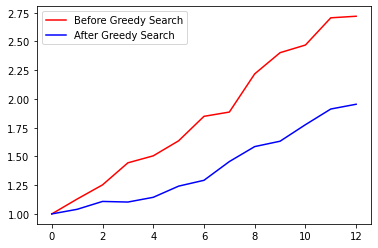

In [68]:
#Greedy Search

#初期状態生成
Solution = GenerateRandomSolution(Nassets)
print("Initial random selection:")
print(Solution, EvaluateSolution(Solution, Chart))
print("")

selected_charts = list()
for i in range(Nassets):
    if Solution[i] == 1:
        selected_charts.append(Chart[i])
portfolioChart = np.mean(selected_charts, axis=0)

#初期状態に基づいてエネルギーの初期化を行う
Energies = list()
for iasset in range(Nassets):
    h = hi(SR_list, PairwiseCorrMat, iasset)
    energyTuple = [-1*abs(h), h , iasset]
    Energies.append(energyTuple)

#貪欲サーチの実行
NGreedyLoop = 10
for i in range(NGreedyLoop):
    heapq.heapify(Energies)

    ntry = 0
    #print(Energies) #エネルギー変化を確認
    while(ntry < len(Energies)):
        x, e, i = heapq.heappop(Energies)
        if e > 0:
            Solution[i] = -1.
        else:
            Solution[i] = 1.
        for ie in Energies:
            n = ie[2]
            ie[1] = ie[1] + Solution[i]*(jij(PairwiseCorrMat, i, n) + jij(PairwiseCorrMat, n, i))
            ie[0] = -ie[1]
        ntry+=1


#貪欲サーチの出力
print("Selection After Greedy Search:")
print(Solution, EvaluateSolution(Solution, Chart))
print("")

selected_charts2 = list()
for i in range(Nassets):
    if Solution[i] == 1:
        selected_charts2.append(Chart[i])
portfolioChart2 = np.mean(selected_charts2, axis=0)

plt.plot(list(range(13)), portfolioChart,color="r",label="Before Greedy Search")
plt.plot(list(range(13)), portfolioChart2,color="b",label="After Greedy Search")
plt.legend()
plt.show()

#### 遺伝的アルゴリズム

貪欲サーチのほかに使われた古典アルゴリズムは遺伝的アルゴリズムである。ランダムに生成した複数のポートフォリオからパフォーマンスが良いものを選択して、その良いポートフォリオをもとで次の世代のポートフォリオを生成する。次の世代のポートフォリオは前の世代のポートフォリオにランダムな変更を加える突然変異と、ポートフォリオ間の遺伝子を交換させるなどで生成できる。ここでは銘柄数が比較的に小さいため、突然変異のみを考えていて、遺伝子間の交換や交配を行わなかった。

結果を比較することで、ラスト世代が第一世代よりもパフォーマンスが良くなっていることを観測できる。ただし、ここで試行した世代数が限られているため、パフォーマンスが改善されないまたは改善が小さい場合もある。そして総じて貪欲サーチよりも安定な出力が得られるのも観察できる。

注意：遺伝子の組数や子孫数、そして変異の数を増やした場合計算量の増加により計算が終わらない場合もあるので、実行環境に合わせて設定を変えてください。

Best Gene 1st generation:
[ 1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1
  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1] 1.8256501321603775

Best Gene last generation:
[ 1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1
  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1  1  1] 2.265446072975892



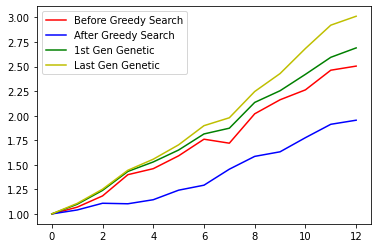

In [41]:
#Genetic Algorithm
Ngenes = 10 #遺伝子の組数
NGenerations = 5 #世代数
#ランダム初期化
Genes = list()
for i in range(Ngenes):
    gene = GenerateRandomSolution(Nassets)
    geneSR = EvaluateSolution(gene, Chart)
    Genes.append([geneSR, gene])
Genes = sorted(Genes,reverse=True)

#第一世代最優良ポートフォリオ
print("Best Gene 1st generation:")
print(Genes[0][1], EvaluateSolution(Genes[0][1], Chart))
print("")

selected_charts3 = list()
for i in range(Nassets):
    if Genes[0][1][i] == 1:
        selected_charts3.append(Chart[i])
portfolioChart3 = np.mean(selected_charts3, axis=0)


#遺伝的アルゴリズム実行
K_best = 5 #上位抽出遺伝子組数
Ndescendants = 2 #子孫数
MaxMutation = 2 #最大変異数
for iIter in range(NGenerations):
    selected_Genes = Genes[:K_best]
    for gene in selected_Genes:
        Descendants = CreateDescendant(gene[1], Ndescendants, MaxMutation)
        for Descendant in Descendants:
            DescendantSR = EvaluateSolution(Descendant, Chart)
            selected_Genes.append([DescendantSR, Descendant])
    selected_Genes = sorted(selected_Genes, key=lambda x: x[0], reverse=True)
    selected_Genes = copy.deepcopy(selected_Genes[:K_best])

#ラスト世代最優良ポートフォリオ
print("Best Gene last generation:")
print(selected_Genes[0][1], EvaluateSolution(selected_Genes[0][1], Chart))
print("")
selected_charts4 = list()
for i in range(Nassets):
    if selected_Genes[0][1][i] == 1:
        selected_charts4.append(Chart[i])
portfolioChart4 = np.mean(selected_charts4, axis=0)

#比較プロットを作る
plt.plot(list(range(13)), portfolioChart,color="r",label="Before Greedy Search")
plt.plot(list(range(13)), portfolioChart2,color="b",label="After Greedy Search")
plt.plot(list(range(13)), portfolioChart3,color="g",label="1st Gen Genetic")
plt.plot(list(range(13)), portfolioChart4,color="y",label="Last Gen Genetic")
plt.legend()
plt.show()


### Quantum Annealingによる解法
Reverse Quantum Annealingでこの最適問題解くために、古典なアルゴリズムで得られたスピン形式の結果をアニーリングが使う形式に変換する。

In [42]:
def ConvertSolutionToQuboState(solution):
    output = list()
    for i in range(len(solution)):
        if solution[i] == 1:
            output.append(1)
        else: output.append(0)
    return output

QA_init_state = ConvertSolutionToQuboState(Solution) #貪欲サーチの結果を初期状態として使う
#QA_init_state = ConvertSolutionToQuboState(selected_Genes[0][1]) #遺伝的アルゴリズムラスト世代の最優良ポートフォリを初期状態として使う
#QA_init_state = GenerateRandomSolution(Nassets) #ランダムな初期状態を使う
print(QA_init_state)
    

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


#### Forward Annealingの場合
銘柄の魅力度とペアワイズ相関による罰金と賞金の度合を使ってQUBO行列を作り、まずForward Annealingを実行する。結果として貪欲サーチの結果よりも安定したチャートを得ている。

<class 'numpy.ndarray'>


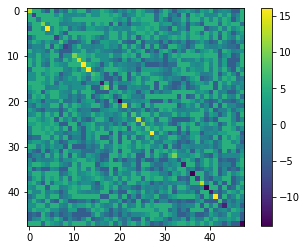

[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)
 ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)
 ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)
 ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)
 ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)
 ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)
 ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0

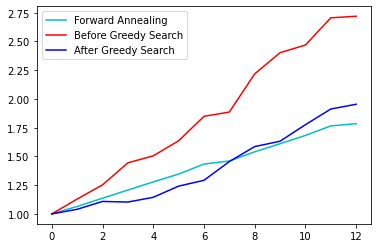

In [69]:
from openjij import SQASampler
sampler = SQASampler()

QUBO = np.random.rand(Nassets**2).reshape(Nassets, Nassets)
for i in range(Nassets):
    for j in range(Nassets):
        QUBO[i][j] = PairwiseCorrMat[i][j]
for i in range(Nassets):
    QUBO[i][i] = QUBO[i][i] + SR_list[i]

print(type(QUBO))
import matplotlib.pyplot as plt
plt.imshow(QUBO)
plt.colorbar()
plt.show()

sampleset_FQA = sampler.sample_qubo(QUBO,num_reads=10)
print(sampleset_FQA.record)
print(sampleset_FQA.record[0][0], EvaluateSolution(sampleset_FQA.record[0][0], Chart))
selected_charts = list()
for i in range(Nassets):
    if sampleset_FQA.record[0][0][i]:
        selected_charts.append(Chart[i])
portfolioChart_FQA = np.mean(selected_charts, axis=0)
plt.plot(list(range(13)), portfolioChart_FQA, color="c", label="Forward Annealing")
plt.plot(list(range(13)), portfolioChart,color="r",label="Before Greedy Search")
plt.plot(list(range(13)), portfolioChart2,color="b",label="After Greedy Search")
plt.legend()
plt.show()


#### Reverse Quantum Annealingの場合
Reverse Annealingの場合、まずは古典的アルゴリズムから得られた状態を初期状態として入力してからアニーリングを行う。

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


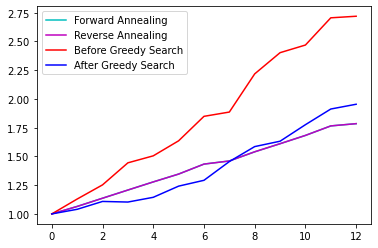

[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 1 1 0 0] 1.9366632044940275
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 1 1 0 0] 1.9366632044940275


In [84]:
#Create RQA schedule
RQAschedule = []
NReverseStep = 50
NPauseStep = 50
NForwardStep = 50
NMCStep = 20
TargetS = 0.38
ReverseStep = (1.0 - TargetS) / NReverseStep
ForwardStep = (1.0 - TargetS) / NForwardStep
beta = 10.
#Reverse Step
#for i in range(NReverseStep):
for i in range(NReverseStep):
    step_sche = [1.0-i*ReverseStep, beta, NMCStep]
    RQAschedule.append(step_sche)   

#Pause Step
RQAschedule.append([TargetS, beta, NPauseStep*NMCStep])

#Forward Step
for i in range(NForwardStep):
    step_sche = [TargetS+(i+1)*ForwardStep, beta, NMCStep]
    RQAschedule.append(step_sche)

init_state = QA_init_state
#init_state = None
print(init_state)
sampleset_RQA = sampler.sample_qubo(QUBO, schedule=RQAschedule, initial_state = init_state, num_reads=10, reinitialize_state=False)

selected_charts = list()
for i in range(Nassets):
    if sampleset_RQA.record[0][0][i]:
        selected_charts.append(Chart[i])
portfolioChart_RQA = np.mean(selected_charts, axis=0)
plt.plot(list(range(13)), portfolioChart_FQA, color="c", label="Forward Annealing")
plt.plot(list(range(13)), portfolioChart_RQA, color="m", label="Reverse Annealing")
plt.plot(list(range(13)), portfolioChart,color="r",label="Before Greedy Search")
plt.plot(list(range(13)), portfolioChart2,color="b",label="After Greedy Search")
plt.legend()
plt.show()

print(sampleset_FQA.record[0][0], EvaluateSolution(sampleset_FQA.record[0][0], Chart))
print(sampleset_RQA.record[0][0], EvaluateSolution(sampleset_RQA.record[0][0], Chart))

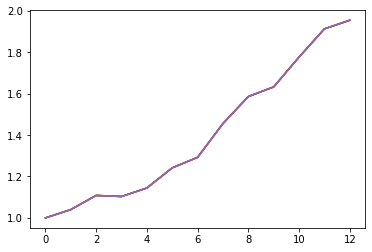

In [64]:
#Create RQA schedule
RQAschedule = []
NReverseStep = 5
TargetS = 0.38
ReverseStep = (1.0 - TargetS) / NReverseStep
beta = 0.5
MC_step = 15
#Reverse Step
#for i in range(NReverseStep):
for i in range(NReverseStep):
    step_sche = [1.0-i*ReverseStep, beta, MC_step]
    RQAschedule.append(step_sche)   

init_state = QA_init_state 
#init_state = None
#sampleset_RQA = sampler.sample_qubo(QUBO, schedule=RQAschedule, initial_state = init_state, num_reads=10, reinitialize_state=False)
for step in RQAschedule:
    selected_charts = list()
    for i in range(Nassets):
        if init_state[i]:
            selected_charts.append(Chart[i])
    portfolioChart = np.mean(selected_charts, axis=0)
    plt.plot(list(range(13)), portfolioChart)
    

sampleset_RQA = sampler.sample_qubo(QUBO, schedule=RQAschedule, initial_state = init_state, num_reads=1, reinitialize_state=False)
#print(sampleset_RQA.record)
pause_initial_state = sampleset_RQA.record[0][0]

[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], -232., 1)]


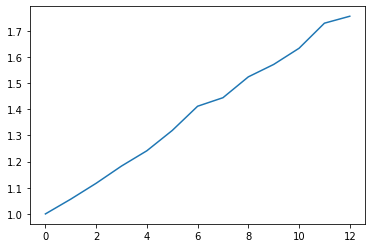

In [46]:
#Create Pause Step
RQAschedule = []
NPauseStep = 5
TargetS = 0.38
beta = 5.0
MC_step = 50
step_sche = [TargetS, beta, MC_step*NPauseStep]
RQAschedule.append(step_sche)

init_state = pause_initial_state
#sampleset_RQA = sampler.sample_qubo(QUBO, schedule=RQAschedule, initial_state = init_state, num_reads=10, reinitialize_state=False)
for step in RQAschedule:
    selected_charts = list()
    for i in range(Nassets):
        if init_state[i]:
            selected_charts.append(Chart[i])
    portfolioChart = np.mean(selected_charts, axis=0)
    plt.plot(list(range(13)), portfolioChart)
    
    sche = [step]
    sampleset_RQA = sampler.sample_qubo(QUBO, schedule=sche, initial_state = sampleset_RQA1.record[0][0], num_reads=1, reinitialize_state=False)
    init_state= sampleset_RQA.record[0][0]
    print(sampleset_RQA.record)
forward_initial_state = sampleset_RQA.record[0][0]


In [47]:
print(sampleset_RQA1.record[0][0])

[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 0 0]


[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], -232., 1)]
[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)]
[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)]
[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)]
[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)]
[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], -233., 1)]
[([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0

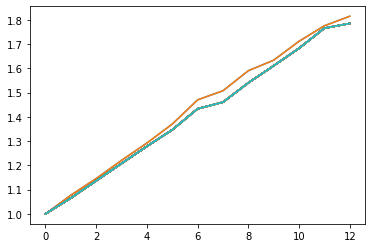

In [48]:
#Create Forward Step
RQAschedule = []
NForwardStep = 50
TargetS = 0.38
ForwardStep = (1.0 - TargetS) / NForwardStep
beta = 5.0
MC_step = 5

#Forward Step
for i in range(NForwardStep):
    step_sche = [TargetS+(i+1)*ForwardStep, beta, MC_step]
    RQAschedule.append(step_sche)

init_state = forward_initial_state
#sampleset_RQA = sampler.sample_qubo(QUBO, schedule=RQAschedule, initial_state = init_state, num_reads=10, reinitialize_state=False)
for step in RQAschedule:
    selected_charts = list()
    for i in range(Nassets):
        if init_state[i]:
            selected_charts.append(Chart[i])
    portfolioChart = np.mean(selected_charts, axis=0)
    plt.plot(list(range(13)), portfolioChart)
    
    sche = [step]
    sampleset_RQA = sampler.sample_qubo(QUBO, schedule=sche, initial_state = init_state, num_reads=1, reinitialize_state=False)
    init_state= sampleset_RQA.record[0][0]
    print(sampleset_RQA.record)

sampleset_RQA = sampler.sample_qubo(QUBO, schedule=RQAschedule, initial_state = init_state, num_reads=5, reinitialize_state=False)
#print(sampleset_RQA.record)

print("")
straight = sampler.sample_qubo(QUBO,num_reads=1,initial_state =forward_initial_state)
print(straight.record)

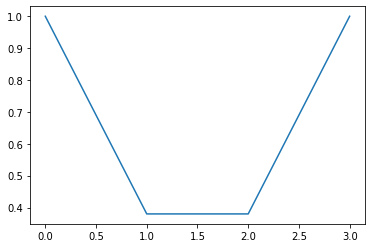

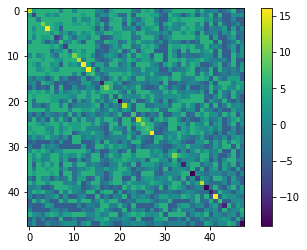

[([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], -256., 1, 0.        )
 ([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], -255., 1, 0.        )
 ([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], -248., 1, 0.        )
 ([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], -239., 1, 0.        )
 ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], -252., 1, 0.02083333)
 ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], -2

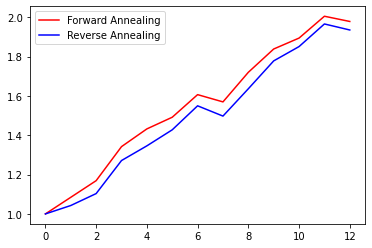

In [50]:
from openjij import SQASampler
from dwave.system import DWaveSampler, EmbeddingComposite
#sampler = SQASampler()

token = '***'
endpoint = 'https://cloud.dwavesys.com/sapi/'

dw_sampler = DWaveSampler(solver='Advantage_system4.1', token=token)
sampler = EmbeddingComposite(dw_sampler)

NassetsList = [48]#, 30, 36, 42, 48, 54, 60]


# RQA schedule
timing = (0,1,2,3)
Ratio = (1.0,0.38,0.38,1.0)
schedule = list(zip(timing,Ratio))
plt.plot(timing,Ratio)
plt.show()


#for Nassets in NassetsList:
#
#    #相関係数などの準備
#    Chart = CreateAssets(Nassets)
#    pairwise_corr = CreateCorrMat(Chart)
#    SR_list = list()
#    for asset in Chart:
#        SR_list.append(CalculateSharpeRatio(asset))
#
#    #Bucketの翻訳
#    SRBucket(SR_list)
#    CorrelationBucket(pairwise_corr)
#    #print(pairwise_corr)
#

QUBO = np.random.rand(Nassets**2).reshape(Nassets, Nassets)
for i in  range(Nassets):
    for j in range(Nassets):
        QUBO[i][j] = pairwise_corr[i][j]
for i in range(Nassets):
    QUBO[i][i] = QUBO[i][i] + SR_list[i]

import matplotlib.pyplot as plt
plt.imshow(QUBO)
plt.colorbar()
plt.show()

sampleset = sampler.sample_qubo(QUBO,num_reads=10)
print(sampleset.record)

min_forword = 0
for result in sampleset.record:
    if result[1] < min_forword:
        min_forword = result[1]
        best_forword = result[0]
    
selected_charts = list()
for i in range(Nassets):
    if best_forword[i]:
        selected_charts.append(Chart[i])
portfolioChart = np.mean(selected_charts, axis=0)
plt.plot(list(range(13)), portfolioChart,color="r",label="Forward Annealing")

#    print("")
#init_state = best_forword
#    print(init_state)
sampleset_RQA = sampler.sample_qubo(QUBO,num_reads=10,  anneal_schedule=schedule, initial_state = QA_init_state)
print(sampleset_RQA.record)

min_RQA = 0
for result in sampleset_RQA.record:
    if result[1] < min_RQA:
        min_RQA = result[1]
        best_RQA = result[0]
selected_charts = list()
for i in range(Nassets):
    if best_RQA[i]:
        selected_charts.append(Chart[i])
portfolioChart = np.mean(selected_charts, axis=0)
plt.plot(list(range(13)), portfolioChart,color="b",label="Reverse Annealing")
plt.legend()
plt.show()


## 参考文献
1. Harry Markowitz, "Portfolio selection", The journal of finance, 7(1):77–91 (1952)
2. Davide Venturelli, Alexei Kondratyev, "Reverse Quantum Annealing Approach to Portfolio Optimization Problems", Quantum Machine Intelligence volume 1, pages17–30 (2019)
3. Sharpe, William F., “Mutual fund performance”, The Journal of Business 39 (1), 119-138 (1966)
